# Inversion Climatology
Inversions offer significant challenges in agriculture, specifically with frost managment and pesticide application. 

In [23]:
# read the pkls
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# read the pkls
all_temp = pd.read_pickle(r'..\Data\ALL_5Min_TEMPS.pkl')
all_TKE = pd.read_pickle(r'..\Data\ALL_5Min_TKE.pkl')
all_wind = pd.read_pickle(r'..\Data\ALL_5Min_WIND.pkl')
print('All five minute data loaded')

invdf=pd.read_pickle(r"..\Data\inversiontimeswithwinds.pkl")
SR=pd.read_pickle(r"..\Data\SRAll.pkl")
print("inversion data loaded")



All five minute data loaded
inversion data loaded


Set up a few common things for all data analysis. 

In [ ]:
towers = ['init', 'rel', 'uconv', 'lconv']
harvest_colors = {'pre-harvest': 'blue', 
    'post-harvest': 'red', 
    'harvest': 'green'}
inversion_markers = {
    'micro': 'o',   # circle
    'short': 's',   # square
    'medium': '^',  # triangle up
    'long': 'D',    # diamond
    'extreme': 'X'  # x
    # add others if needed
}

# Create dictionaries to hold information about harvest conditions and inversion types
harvest_conditions = {}
harvest_conditions['pre_harvest'] = {'color': 'blue', 'label': 'Pre-Harvest'}
harvest_conditions['post_harvest'] = {'color': 'red', 'label': 'Post-Harvest'}
harvest_conditions['harvest'] = {'color': 'green', 'label': 'Harvest'}

inversion_types = {}
inversion_types['micro'] = {'marker': 'o', 'label': 'Micro', 'description': '<5 min'}
inversion_types['short'] = {'marker': 's', 'label': 'Short', 'description': '5 min - 1 hr'}
inversion_types['medium'] = {'marker': '^', 'label': 'Medium', 'description': '1 hr - 3 hr'}
inversion_types['long'] = {'marker': 'D', 'label': 'Long', 'description': '3 hr - 11.5 hr'}
inversion_types['extreme'] = {'marker': 'X', 'label': 'Extreme', 'description': '> 11.5 hr'}

cardinal_directions = {
    0: 'N',
    45: 'NE',
    90: 'E',
    135: 'SE',
    180: 'S',
    225: 'SW',
    270: 'W',
    315: 'NW'
}


# Example usage:
# plt.scatter(x, y, color=harvest_conditions['pre_harvest']['color'], marker=inversion_types['micro']['marker'])

In [29]:
# Lets look at the inversion types
inv_order = ['micro', 'short', 'medium', 'long', 'extreme']
invdf['Inv Class'] = pd.Categorical(invdf['Inv Class'], categories=inv_order, ordered=True)

print(invdf['Inv Class'].value_counts(sort=False))

Inv Class
micro      417
short      586
medium     231
long       210
extreme    286
Name: count, dtype: int64


In [7]:
# wind shear hexbinned by vertical temp difference

# do just for initiation tower to start
# Find all variables with 'init' or 'Init' in their names
init_temp = all_temp.filter(like='init', axis=1)
init_wind = all_wind.filter(like='init', axis=1)
init_TKE = all_TKE.filter(like='init', axis=1)
# merge
init_all = pd.concat([init_temp, init_wind, init_TKE], axis=1)
print('initiation tower data extracted')

initiation tower data extracted


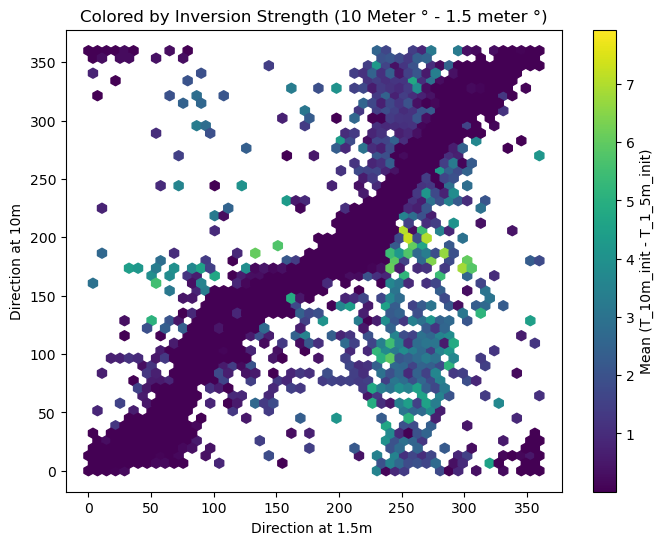

In [101]:
vmax = np.nanmax(np.abs(init_all['T_10m_init'] - init_all['T_1_5m_init']))
vmin = np.nanmin(np.abs(init_all['T_10m_init'] - init_all['T_1_5m_init']))
plt.figure(figsize=(8, 6))
hb = plt.hexbin(
    x=init_all['dir_1_5m_init'],
    y=init_all['dir_10m_init'],
    C=init_all['T_10m_init'] - init_all['T_1_5m_init'],
    gridsize=50,
    cmap='viridis', 
    reduce_C_function=np.min,
    mincnt=1,
    vmin=vmin,
    vmax=vmax
)
plt.colorbar(hb, label='Mean (T_10m_init - T_1_5m_init)')
plt.xlabel('Direction at 1.5m ')
plt.ylabel('Direction at 10m')
plt.title('Colored by Inversion Strength (10 Meter ° - 1.5 meter °)')
plt.show()

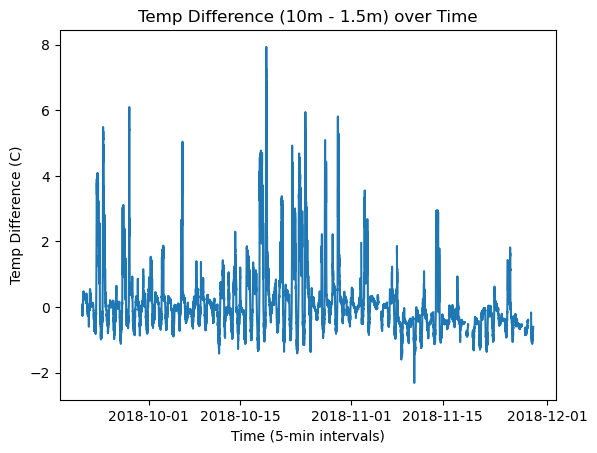

In [17]:
plt.plot(init_all['T_10m_init'] - init_all['T_1_5m_init'])
plt.title('Temp Difference (10m - 1.5m) over Time')
plt.ylabel('Temp Difference (C)')
plt.xlabel('Time (5-min intervals)')
plt.show()

In [30]:
# Read net cdf data
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


In [34]:
file2read = netcdf.netcdf_file(r'..\Data\nc\isfs_theotc_20181026.nc', 'r') #(r'..\Data\nc\isfs_thotc_20181026.nc') #Data\nc\isfs_theotc_20181026.nc
temp = file2read.variables[var] # var can be 'Theta', 'S', 'V', 'U' etc..
data = temp[:]*1
file2read.close()
 

C:\Users\bmaro\AppData\Local\Temp\ipykernel_3800\3875038936.py:1: DeprecationWarning: Please import `netcdf_file` from the `scipy.io` namespace; the `scipy.io.netcdf` namespace is deprecated and will be removed in SciPy 2.0.0.
  file2read = netcdf.netcdf_file(r'..\Data\nc\isfs_theotc_20181026.nc', 'r') #(r'..\Data\nc\isfs_thotc_20181026.nc') #Data\nc\isfs_theotc_20181026.nc


NameError: name 'var' is not defined

In [39]:
file2read.variables

{'station': <scipy.io._netcdf.netcdf_variable at 0x220b7090680>,
 'latitude': <scipy.io._netcdf.netcdf_variable at 0x220b7090730>,
 'longitude': <scipy.io._netcdf.netcdf_variable at 0x220b70907e0>,
 'altitude': <scipy.io._netcdf.netcdf_variable at 0x220b7090890>,
 'base_time': <scipy.io._netcdf.netcdf_variable at 0x220b7090940>,
 'time': <scipy.io._netcdf.netcdf_variable at 0x220b70909f0>,
 'GPSnsat_p4': <scipy.io._netcdf.netcdf_variable at 0x220b7090aa0>,
 'GPSstat_p4': <scipy.io._netcdf.netcdf_variable at 0x220b7090b50>,
 'P_1_5m_p5': <scipy.io._netcdf.netcdf_variable at 0x220b7090c00>,
 'P_P__1_5m_p5': <scipy.io._netcdf.netcdf_variable at 0x220b7090cb0>,
 'Qsoil_5cm_b_lconv': <scipy.io._netcdf.netcdf_variable at 0x220b7090d60>,
 'Gsoil_5cm_b_lconv': <scipy.io._netcdf.netcdf_variable at 0x220b7090e10>,
 'Rsw_in_b_lconv': <scipy.io._netcdf.netcdf_variable at 0x220b7090ec0>,
 'Rsw_out_b_lconv': <scipy.io._netcdf.netcdf_variable at 0x220b7090f70>,
 'Rpile_in_b_lconv': <scipy.io._netcdf.

In [50]:
# get latitude and longitude for stations
file2read.variables

{'station': <scipy.io._netcdf.netcdf_variable at 0x220b7090680>,
 'latitude': <scipy.io._netcdf.netcdf_variable at 0x220b7090730>,
 'longitude': <scipy.io._netcdf.netcdf_variable at 0x220b70907e0>,
 'altitude': <scipy.io._netcdf.netcdf_variable at 0x220b7090890>,
 'base_time': <scipy.io._netcdf.netcdf_variable at 0x220b7090940>,
 'time': <scipy.io._netcdf.netcdf_variable at 0x220b70909f0>,
 'GPSnsat_p4': <scipy.io._netcdf.netcdf_variable at 0x220b7090aa0>,
 'GPSstat_p4': <scipy.io._netcdf.netcdf_variable at 0x220b7090b50>,
 'P_1_5m_p5': <scipy.io._netcdf.netcdf_variable at 0x220b7090c00>,
 'P_P__1_5m_p5': <scipy.io._netcdf.netcdf_variable at 0x220b7090cb0>,
 'Qsoil_5cm_b_lconv': <scipy.io._netcdf.netcdf_variable at 0x220b7090d60>,
 'Gsoil_5cm_b_lconv': <scipy.io._netcdf.netcdf_variable at 0x220b7090e10>,
 'Rsw_in_b_lconv': <scipy.io._netcdf.netcdf_variable at 0x220b7090ec0>,
 'Rsw_out_b_lconv': <scipy.io._netcdf.netcdf_variable at 0x220b7090f70>,
 'Rpile_in_b_lconv': <scipy.io._netcdf.

In [77]:
import xarray as xr

# open file
ds = xr.open_dataset(r'..\Data\nc\isfs_theotc_20181127.nc')

# check metadata
# print(ds)

# access a variable
print(ds['latitude'])

# get the values as a NumPy array
arr = ds['latitude'].values

# convert to pandas DataFrame
df = ds.to_dataframe()


<xarray.DataArray 'latitude' (station: 19)> Size: 152B
[19 values with dtype=float64]
Coordinates:
  * station  (station) |S6 114B b'p1' b'p2' b'p3' ... b'uconv2' b'uconvm'
Attributes:
    units:       degree_N
    short_name:  latitude
    long_name:   Degrees N Latitude


In [90]:
init_wind = ds['u_1_5m_init']

In [95]:
x, y = init_wind.metpy.coordinates('x', 'y')

AttributeError: x attribute is not available.

In [100]:
ds

<xarray.Dataset> Size: 1MB
Dimensions:                  (station: 19, time: 288)
Coordinates:
  * station                  (station) |S6 114B b'p1' b'p2' ... b'uconvm'
  * time                     (time) datetime64[ns] 2kB 2018-11-27T00:02:30 .....
Data variables: (12/1094)
    latitude                 (station) float64 152B nan nan nan ... nan nan nan
    longitude                (station) float64 152B nan nan nan ... nan nan nan
    altitude                 (station) float32 76B nan nan nan ... nan nan nan
    base_time                datetime64[ns] 8B 2018-11-27
    counts_1_5m_init         (time) float64 2kB 6e+03 6e+03 ... 6e+03 6e+03
    u_1_5m_init              (time) float32 1kB 6.197 6.21 6.323 ... 4.783 4.089
    ...                       ...
    Rlw_in_g_uconv           (time) float32 1kB 289.6 289.4 ... 248.8 254.0
    Rlw_out_g_uconv          (time) float32 1kB 301.3 301.2 ... 284.8 284.3
    Rlw_in_b_lconv           (time) float32 1kB 285.5 285.7 282.2 ... nan nan
    Rlw_out_b_lconv          (time) float32 1kB 300.8 300.7 300.2 ... nan nan
    Rlw_in_20m_lconv         (time) float32 1kB 281.9 282.0 278.6 ... nan nan
    Rlw_out_20m_lconv        (time) float32 1kB 295.9 295.6 295.4 ... nan nan
Attributes:
    history:                   Created: 2019-07-29 23:02:07 +0000\nUpdated: 2...
    NIDAS_version:             v1.2-1065
    calibration_file_path:     /net/isf/isfs/projects/SAVANT/ISFS/cal_files/Q...
    dataset:                   qc_geo_theo_tiltcor
    dataset_description:       QC, winds in geographic, theodolite tilted coo...
    project_config:            /net/isf/isfs/projects/SAVANT/ISFS/config/sava...
    wind3d_horiz_coordinates:  geographic
    file_length_seconds:       86400
    wind3d_horiz_rotation:     1
    wind3d_tilt_correction:    1